In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data set

df=pd.read_csv('train(1).csv')
df


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [3]:
# check null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [4]:
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


# Feature selection

In [4]:
x=df.drop(labels=['target','id'],axis=1)
y=df['target']

<AxesSubplot:>

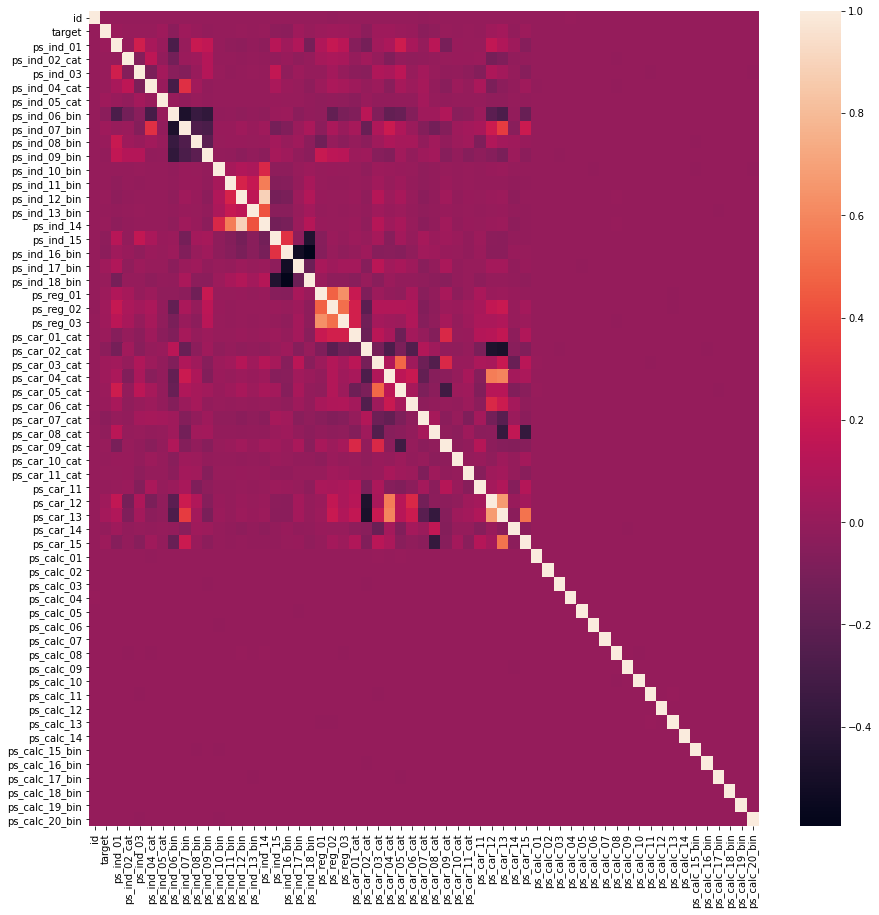

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# check correlation

corr=df.corr()
fig,ax=plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corr)


In [6]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [7]:
corr_feature=correlation(x,0.75)
len(set(corr_feature))

1

In [9]:
corr_feature

{'ps_ind_14'}

In [8]:
x.drop(corr_feature,axis=1)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1,10,0,0,0,0,0,1,0,...,4,1,9,6,0,1,1,0,1,1
595208,5,1,3,0,0,0,0,0,1,0,...,4,1,3,8,1,0,1,0,1,1
595209,1,1,10,0,0,1,0,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,5,2,3,1,0,0,0,1,0,0,...,4,1,4,2,0,1,1,1,0,0


#  Scaling/Normalization

In [9]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()



x= scale.fit_transform(x)

print(x)

[[ 0.0502179   0.9645855   0.21359383 ... -0.63472992 -0.73222528
   2.34997253]
 [-0.45386836 -0.54009356  0.95436209 ... -0.63472992  1.36569991
  -0.42553689]
 [ 1.56247669  3.9739436   1.69513035 ... -0.63472992  1.36569991
  -0.42553689]
 ...
 [-0.45386836 -0.54009356  2.06551448 ... -0.63472992 -0.73222528
  -0.42553689]
 [ 1.56247669  0.9645855  -0.52717443 ...  1.57547323 -0.73222528
  -0.42553689]
 [-0.95795462 -0.54009356  1.32474622 ... -0.63472992 -0.73222528
  -0.42553689]]


# split test and train data

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

# traditional method

In [11]:
# logistic regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [12]:
output_1=lr.predict(x_test)
output_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
# find accuracy

from sklearn import metrics
acc=metrics.accuracy_score(output_1,y_test)
print('accuracy score: ',acc)

accuracy score:  0.9637273926228338


In [14]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(output_1,y_test)
con

array([[114725,   4318],
       [     0,      0]], dtype=int64)

# F1 score

In [15]:
# find precision
lr_precision=((114680)/(114680+4363))
lr_precision

0.9633493779558647

In [16]:
# find Recall

lr_recall=(114680)/(114680+0)
lr_recall

1.0

In [17]:
# f1 score

lr_f1_score=(2*(lr_precision*lr_recall))/(lr_recall+lr_precision)
lr_f1_score

0.9813326031242111

# MLPclassifier algorithm

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
mlp=MLPClassifier(max_iter=500,activation='relu')
mlp

MLPClassifier(max_iter=500)

In [20]:
mlp.fit(x_train,y_train)


MLPClassifier(max_iter=500)

In [21]:
output_2=mlp.predict(x_test)
output_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
# find accuracy

from sklearn import metrics
acc=metrics.accuracy_score(output_2,y_test)
print('accuracy score: ',acc)

accuracy score:  0.9637021916450358


In [23]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(output_2,y_test)
con

array([[114717,   4313],
       [     8,      5]], dtype=int64)

# F1 score

In [24]:
# find precision
mlp_precision=((114675)/(114675+4361))
mlp_precision

0.9633640243287744

In [25]:
# find Recall

mlp_recall=(114675)/(114675+5)
mlp_recall

0.9999564004185559

In [26]:
# f1 score

mlp_f1_score=(2*(mlp_precision*mlp_recall))/(mlp_recall+mlp_precision)
mlp_f1_score

0.9813192079275701

In [27]:
# Logistic Regression model has the best F1-score : 0.9813326031242111